<a href="https://colab.research.google.com/github/Geovani-Cp/projeto-AnaliseDeDados1/blob/main/PrimeiroProjetoAnaliseDeDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predição de bons pagadores de cartão de credito


## 1.Bibliotecas

In [1]:
import pandas as pd


## 2.Carregando dados

In [2]:
df = pd.read_excel('https://github.com/TrainingByPackt/Data-Science-Projects-with-Python/raw/master/Data/default_of_credit_card_clients__courseware_version_1_21_19.xls')

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.shape

(30000, 25)

## 3. Verificando a integridade dos dados

### 3.1 verificando as colunas

In [5]:
print ('Total de coluna',len(df.columns),)
df.columns

Total de coluna 25


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

#### 3.1.1 Dicionario de Dados

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.


## 3.2 Dando uma olhada nos dados

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## 3.3 Verificando  se todos IDS são unicos

In [7]:
df['ID'].nunique()

29687

## 3.4 Verificando o total de linhas

In [8]:
df.shape[0]

30000

### 3.5 contagem de IDS

In [9]:
id_counts = df['ID'].value_counts()
id_counts.head()

,count
ID,
89f8f447-fca8,2
7c9b7473-cc2f,2
90330d02-82d9,2
75938fec-e5ec,2
2a793ecf-05c6,2


### 3.6 Contagem de repetições

In [10]:
id_counts.value_counts()

,count
count,
1,29374
2,313


## 4.Analise de Dados duplicados

### 4.1 IDS que se repetem

In [11]:
dupe_mask = id_counts == 2
dupe_mask[:5]

,count
ID,
89f8f447-fca8,True
7c9b7473-cc2f,True
90330d02-82d9,True
75938fec-e5ec,True
2a793ecf-05c6,True


### 4.2

In [12]:
id_counts.index[:5]

Index(['89f8f447-fca8', '7c9b7473-cc2f', '90330d02-82d9', '75938fec-e5ec',
       '2a793ecf-05c6'],
      dtype='object', name='ID')

### 4.3 Selecionar os IDS duplicados

In [13]:
dupe_ids = id_counts.index[dupe_mask]

### 4.4 Selecionar Ids e colcar em lista

In [14]:
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

### 4.5 verificando o 5 primeirso intens de dupe_ids

In [15]:
dupe_ids[:5]

['89f8f447-fca8',
 '7c9b7473-cc2f',
 '90330d02-82d9',
 '75938fec-e5ec',
 '2a793ecf-05c6']

### 4.6 selecionando linhas ids duplicados

In [16]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15879,7c9b7473-cc2f,90000,2,1,1,29,0,0,0,0,...,27751,20292,14937,2967,2007,1429,1092,412,263,0
15979,7c9b7473-cc2f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29646,90330d02-82d9,70000,1,2,1,29,0,0,0,0,...,10694,27908,11192,2009,1404,3016,20001,2000,5002,0
29746,90330d02-82d9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 4.7 preparando a matriz booleana para filtragem do dataframe

In [17]:
df_zero_mask = df == 0

### 4.8 criando uma serie booleana

In [18]:
feature_zero_mas = df_zero_mask.iloc[:, 1:].all(axis=1)

print(feature_zero_mas,'\n')
sum(feature_zero_mas)

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool 



315

### 4.9 soma das linhas nulas

In [19]:
sum(feature_zero_mas)

315

### 4.10 Eliminar linhas nulas

In [20]:
df_clean_1 = df.loc[~feature_zero_mas,:].copy()

### 4.11 codigo para verificar shappe do dataframe

In [21]:
df_clean_1.shape

(29685, 25)

### 4.12 Verificando se o Problema foi resolvido

In [22]:
df_clean_1['ID'].nunique()

29685

## 5 Explorando e limpado dados

### 5.1 informaões sobre o dataset

In [23]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  int64 


### 5.2 Visalizando primeiras linhas

In [24]:
df_clean_1['PAY_1'].head(5)

,PAY_1
0,2
1,-1
2,0
3,0
4,-1


### 5.3 Contagem de valores unicos

In [25]:
df_clean_1['PAY_1'].value_counts()

,count
PAY_1,
0,13087
-1,5047
1,3261
Not available,3021
-2,2476
2,2378
3,292
4,63
5,23


### 5.4 Criar a mascara Booleana para remover valore ausentes

In [26]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

,PAY_1
0,True
1,True
2,True
3,True
4,True


### 5.5 somando a quatidade de true

In [27]:
sum(valid_pay_1_mask)

26664

## 5.6 Limppando dados ausentes

In [28]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()


### 5.7 Vereficando o 'Shape do dataframe'

In [29]:
df_clean_2.shape

(26664, 25)

### 5.8

In [33]:
## Convertendo o tipo e movendo para a coluna
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype(int)

In [35]:
df_clean_2[['PAY_1','PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


**Explicações adicionais sobre as colunas  feitas pelo sócio da empresa**

* -2: significa que começou o mês sem valor a ser pago e o crédito não foi usado.
* -1: significa que usou um valor que foi totalmmente pago.
* 0: significa que o pagamento minimo foi feto, mas o saldo total devedor não foi pago.

## 6.Explorando o limite de credito e as caracteristicas demograficas

### 6.1 Imortando Bibliotecas e configuurando o Matplotlib

In [36]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

### 6.2 Gerar histogramas para AGE e LIMIT_BAL

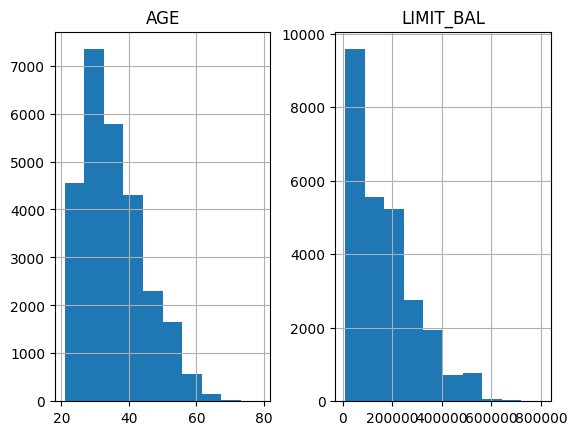

In [38]:
df_clean_2[['AGE', 'LIMIT_BAL']].hist();

### 6.3 Estatítica Descritiva de AGE e LIMIT_BAL

In [39]:
df_clean_2[['AGE', 'LIMIT_BAL']].describe()

,AGE,LIMIT_BAL
count,26664.000000,26664.000000
mean,35.505213,167919.054905
std,9.227442,129839.453081
min,21.000000,10000.000000
25%,28.000000,50000.000000
50%,34.000000,140000.000000
75%,41.000000,240000.000000
max,79.000000,800000.000000


### 6.4 Contagem de ocorrência por categoria em EDUCATION

In [40]:
df_clean_2['EDUCATION'].value_counts()

,count
EDUCATION,
2,12458
1,9412
3,4380
5,245
4,115
6,43
0,11


### 6.5 Trandfomar 0, 5 e 6 em outros(4)

In [50]:
df_clean_2['EDUCATION'].replace(to_replace = [0, 5, 6], value = 4, inplace=True)
df_clean_2['EDUCATION'].value_counts()

,count
EDUCATION,


### 6.6 Contagem de ocorrência por categoria em MARRIAGE

In [51]:
df_clean_2['Marriage'].value_counts()

KeyError: 'Marriage'